In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

<IPython.core.display.Javascript object>


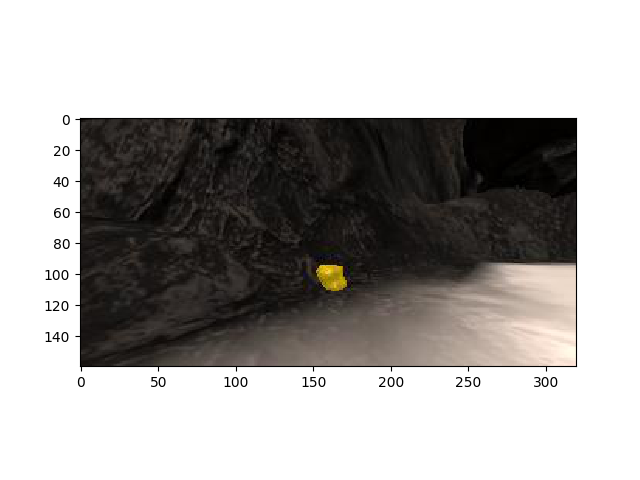

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib notebook
image = mpimg.imread('calibration_images/example_rock2.jpg')
# image = mpimg.imread('sample.jpg')
# image = mpimg.imread('../rover_train/IMG/robocam_2017_05_26_20_01_42_027.jpg')
plt.imshow(image)
plt.show()

<IPython.core.display.Javascript object>


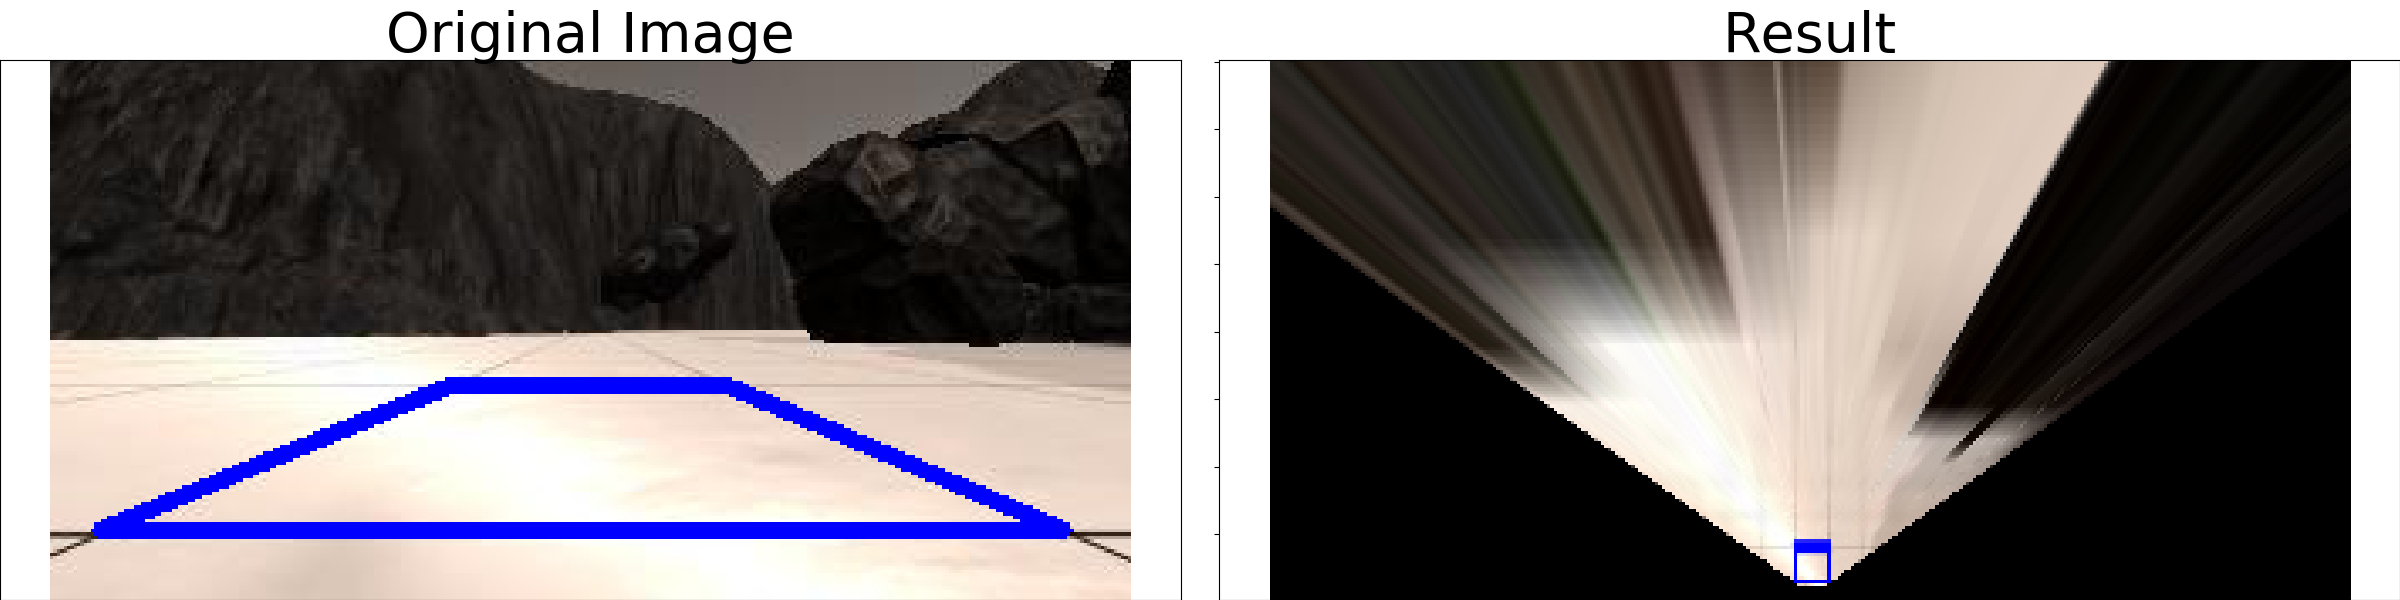

In [7]:
def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
source = np.float32([[14, 139], [300, 139], [200, 96], [118, 96]])

distance = 5
robot_offset = 6

destination = np.float32([[image.shape[1]/2 - distance, image.shape[0] - robot_offset], 
                 [image.shape[1]/2 + distance, image.shape[0] - robot_offset], 
                 [image.shape[1]/2 + distance, image.shape[0] - 2 * distance - robot_offset], 
                 [image.shape[1]/2 - distance, image.shape[0] - 2 * distance - robot_offset]])

warped = perspect_transform(image, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show()